<a href="https://colab.research.google.com/github/Bluelord/Intro_to_ML_Python_Notes/blob/master/Supervised_Learning/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

Decision Tree are widly used models for classification and regeression tasks. They learn a hierarchy of if/else questions, leading to a decision. Each node in the tree represents a question and the end node called leaf cantains the answer.

### Building decision trees

Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly. To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable. The top node, also called the root, represents the whole dataset. 

![](Supervised_Learning/Images/Decision_boundary_depth1.JPG)

**Decision Tree with Depth 1.**

![](Supervised_Learning/Images/Decision_boundary_depth2.JPG)

**Decision Tree with Depth 2.**

![](Supervised_Learning/Images/Decision_boundary_depth9.JPG)

**Decision Tree with Depth 9.**


This recursive process yields a binary tree of decisions, with each node containing a test. Alternatively, you can think of each test as splitting the part of the data that is currently being considered along one axis. The recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision tree) only contains a single target value (a single class or a single regression value).

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target. It is also possible to use trees for regression tasks to find
the leaf the new data point falls into. The output for this data point is the mean target of the training points in this leaf.

### Controlling complexity of decision trees

Building a tree as described above and continuing until all leaves are pure
leads to models that are very complex, lead to overfitting to the training data, this pure leaves mean that a tree is 100% accurate on the training set.
The overfitting can be seen in the decision tree with the depth 9, in that we can see the regions determined to belong to class 1 in the middle of all the points belonging to class 0.

There are two common strategies to prevent overfitting:
*   Stopping the creation of the tree early (pre-pruning)
*   Building the tree but then removing nodes that contain little information (post-pruning)

Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=25)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {: .3f}" .format(
    tree.score(X_train, y_train)))
print("Accuracy on testing set: {: .3f}" .format(
    tree.score(X_test, y_test)))

Accuracy on training set:  1.000
Accuracy on testing set:  0.916


The Accuracy for the training set is 100%, as the leaves are pure, if we don't restrict the depth of decision tree, the tree mostly becomes complex. Unpruned tree are prone to overfitting and does not generalize well on new data. 

In [ ]:
# Now applying pre-pruning

tree4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree4.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree4.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.930


### Analysing decision trees

Visualizing of decision tree can be done with the help of export_graphviz

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree4, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names= load_breast_cancer().feature_names, impurity=False, filled=True)

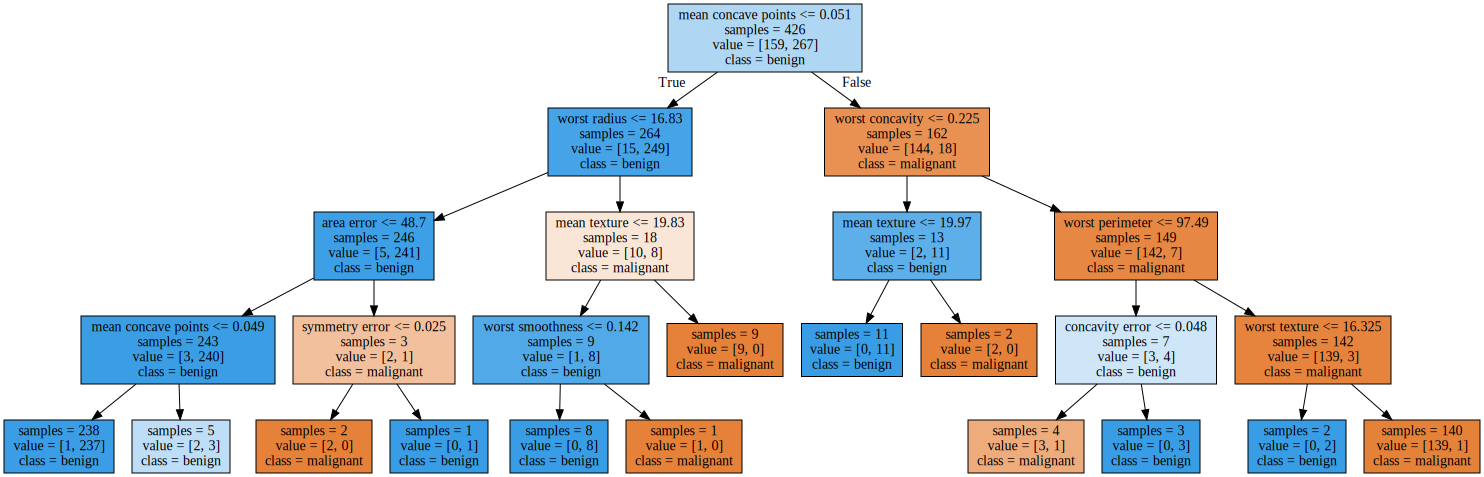

In [ ]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
  
graphviz.Source(dot_graph)

The visualization of the tree provides a great in-depth view of how the algorithm makes predictions, and is a good example of a machine learning algorithm that is easily explained to nonexperts.

### Feature importance in trees

There are some useful properties that we can derive to summarize the tree. The commonly used summary is feature importance. If a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.05266035 0.         0.         0.         0.
 0.00752597 0.70517703 0.00668975 0.         0.         0.
 0.         0.01273138 0.         0.         0.         0.
 0.         0.01859592 0.06025702 0.03193438 0.         0.02027231
 0.         0.00752597 0.07662994 0.         0.         0.        ]


In [ ]:
#importing data from drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Decision trees for classification, all that was said is similarly true for decision trees for regression, There is one particular property of using tree-based models for regression that is not able to extrapolate, or make predictions outside of the range of the training data.

Text(0, 0.5, 'Price in $/Mbyte')

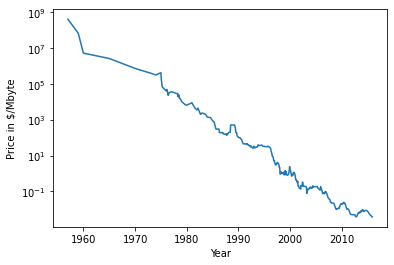

In [ ]:
ram_prices = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro ML/Dataset/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


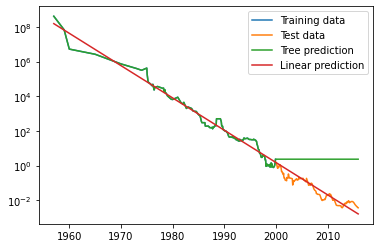

In [ ]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

Linear Regression line provides quite a good forecast for the test data, while glossing over some of the finer variations in both training & test.

The tree model, on the other hand, makes perfect predictions on the training data; when not restrict the complexity of the tree, However, once we leave the data range for which the model has data. The tree has no ability to generate “new” responses, outside of what was seen in the training data. This shortcoming applies to all models based on trees.

### Strengths, weaknesses, and parameters

Parameters that control model complexity in decision trees
are the pre-pruning parameters that stop the building of the tree before it developed.

Decision trees have two advantages over many of the algorithms: the resulting model can easily be visualized and understood by nonexperts. 

Decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance.